In [1]:
from proteus.iproteus import * #pull in what we need for using proteus interactively
Profiling.logLevel=3
Profiling.verbose = True
load_macros("macros.tex")

$\newcommand{\C}{\mathbb{C}}$
$\newcommand{\Du}{\underline{D}}$
$\newcommand{\veps}{\varepsilon}$
$\newcommand{\eps}{\epsilon}$
$\newcommand{\f}{\textbf{f}}$
$\newcommand{\fb}{\textbf{f}}$
$\newcommand{\F}{\mathbb{F}}$
$\newcommand{\Fb}{\textbf{F}}$
$\newcommand{\gb}{\textbf{g}}$
$\newcommand{\h}{\textbf{h}}$
$\newcommand{\kb}{\textbf{k}}$
$\newcommand{\M}{\mathcal{M}}$
$\newcommand{\N}{\mathbb{N}}$
$\newcommand{\Norm}{\textbf{N}}$
$\newcommand{\n}{\textbf{n}}$
$\newcommand{\vp}{\varphi}$
$\newcommand{\vph}{\hat{\varphi}}$
$\newcommand{\p}{\phi}$
$\newcommand{\Proj}{\mathbb{P}}$
$\newcommand{\Pcal}{\mathcal{P}}$
$\newcommand{\Q}{\mathbb{Q}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\rb}{\textbf{r}}$
$\newcommand{\s}[1]{\mathcal{#1}}$
$\newcommand{\supp}{\text{supp}}$
$\newcommand{\Surf}{\textbf{S}}$
$\newcommand{\tpsi}{\tilde{\psi}}$
$\newcommand{\ub}{\textbf{u}}$
$\newcommand{\U}{\textbf{U}}$
$\newcommand{\vb}{\textbf{v}}$
$\newcommand{\V}{\mathbb{V}}$
$\newcommand{\wb}{\textbf{w}}$
$\newcommand{\x}{\textbf{x}}$
$\newcommand{\xh}{\hat{x}}$
$\newcommand{\X}{\textbf{X}}$
$\newcommand{\y}{\textbf{y}}$
$\newcommand{\yh}{\hat{y}}$
$\newcommand{\Y}{\textbf{Y}}$
$\newcommand{\Z}{\mathbb{Z}}$
$\DeclareMathOperator{\sech}{sech}$
$\DeclareMathOperator{\atanh}{atanh}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\tr}{Trace}$
$\DeclareMathOperator{\gradsymm}{\nabla_{s}}$
$\DeclareMathOperator{\divergence}{div}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator*{\argmin}{argmin}$
$\DeclareMathOperator*{\argmax}{argmax}$
$\DeclareMathOperator{\Span}{Span}$
$\DeclareMathOperator{\rank}{rank}$
$\newcommand{\br}[1]{\left\langle #1 \right\rangle}$
$\newcommand{\paren}[1]{\left(#1\right)}$
$\newcommand{\sq}[1]{\left[#1\right]}$
$\newcommand{\set}[1]{\left\{\: #1 \:\right\}}$
$\newcommand{\setp}[2]{\left\{\, #1\: \middle|\: #2 \, \right\}}$
$\newcommand{\abs}[1]{\left| #1 \right|}$
$\newcommand{\norm}[1]{\left\| #1 \right\|}$
$\newcommand{\system}[1]{\left\{ \begin{array}{rl} #1 \end{array} \right.}$
$\newcommand{\pf}[2]{\frac{\partial #1}{\partial #2}}$
$\newcommand{\ipt}[2]{\langle #1,#2 \rangle}$
$\newcommand{\ip}{\int_{-\infty}^{+\infty}}$
$\renewcommand{\ker}[1]{\mathcal{N}(#1)}$
$\newcommand{\ran}[1]{\mathcal{R}(#1)}$


## Problem Description

Solve the 2D Navier-Stokes equation on a square domain.  That is, find density $\rho>0$, velocity field $\mathbf{v}:\Omega \rightarrow \mathbb{R} \times \mathbb{R}^2$ and pressure $p:\Omega\rightarrow\R$ such that

$$
\begin{equation}
\begin{cases}
\rho_t + \nabla\cdot(\rho\vb) = 0,&\\
\rho\left(\frac{\partial \vb}{\partial t} + \vb\cdot\nabla\vb\right) +  \nabla p  - \nabla \cdot \left(\mu \nabla\vb\right) = \fb(x,t),&\\
\nabla \cdot \vb  = 0,&
\end{cases}
\end{equation}
$$

on domain $\Omega = [0,1]^2$ and time interval $[0,T].$ Here $\mathbf{f}(x,t)$ is a smooth external force and the dynamic viscosity, $\mu>0$, is constant. 

Let $\partial\Omega^{in} = \{\x\in\partial\Omega \:|\: \vb\cdot \n < 0 \}$ be the inflow boundary.  We supplement the above system with initial conditions for density and velocity and inflow boundary conditions for density and dirichlet boundary conditions for velocity.

$$
\begin{equation}
  \begin{cases}
    \rho(\x,0) = \rho_0(\x),&\\
    \vb(\x,0) = \vb_0(\x),&
  \end{cases}
\end{equation}
$$
and
$$
\begin{equation}
  \begin{cases}
    \left.\rho(\x,t)\right|_{\partial\Omega^{in}} = \rho^{in}(\x,t),&\\
    \left.\vb(\x,t)\right|_{\partial\Omega} = b(\x,t),&
  \end{cases}
\end{equation}
$$

If $b(\x,t)=0$ then our boundary is impermeable and $\partial\Omega^{in} = \emptyset$.  However if we do allow for non zero boundary conditions for velocity, then our inflow set could be non empty.

We can add inflow boundary conditions for the pressure term as well until we do our splitting in which case pressure will be fixed by our intermediate steps.
 

###Define the PDE by defining the coefficients

In [2]:
import imp

import NavierStokes
# from NavierStokes import NavierStokes2D
imp.reload(NavierStokes)

display_src(NavierStokes.NavierStokes2D)

```Python
class NavierStokes2D(TransportCoefficients.TC_base):
    r"""
    The coefficients of the 2D Navier Stokes momentum equation with variable density.  This coefficient class
    will only represent the momentum equation and the incompressibility equation but not the conservation of mass.

    For completeness we give them all and note that this class only represents the 2nd and 3rd equation.
    .. math::
       :nowrap:

       \begin{equation}
       \begin{cases}
       \rho_t + \nabla\cdot(\rho\vb) = 0,&\\
       \rho\left(\frac{\partial \vb}{\partial t} + \vb\cdot\nabla\vb\right) +  \nabla p  - \nabla \cdot \left(\mu \nabla\vb\right) = \fb(x,t),&\\
       \nabla \cdot \vb  = 0,&
       \end{cases}
       \end{equation}

    where :math:`\rho>0` is the density, :math:`\mathbf{v}` is the velocity field,  :math:`p` is the pressure and :math:`\mu` is the dynamic
    viscosity which could depend on density :math:`\rho`.

    We solve this equation on a 2D disk :math:`\Omega=\{(x,y) \:|\: x^2+y^2<1\}`
    
    :param densityModelIndex: The index into the proteus model list

    :param densityFunction: A function taking as input an array of spatial
    locations :math: `x`, time :math: `t`, and density :math: `\rho`, setting
    the density parameter as a side effect.

    TODO: decide how the parameters interact. I think densityFunction
    should override the density from another model

    """
    def __init__(self,f1ofx,f2ofx,mu=1.0,densityModelIndex=-1,densityFunction=None):
        
        sdInfo  = {(0,0):(np.array([0,1,2],dtype='i'),  # sparse diffusion uses diagonal element for diffusion coefficient
                          np.array([0,1],dtype='i')),
                   (1,1):(np.array([0,1,2],dtype='i'),
                          np.array([0,1],dtype='i'))}
        dim=2; # dimension of space
        xi=0; yi=1; # indices for first component or second component of dimension
        eu=0; ev=1; ediv=2; # equation numbers  momentum u, momentum v, divergencefree
        ui=0; vi=1; pi=2;  # variable name ordering
        
        TransportCoefficients.TC_base.__init__(self, 
                         nc=dim+1, #number of components  u, v, p
                         variableNames=['u','v','p'], # defines variable reference order [0, 1, 2]
                         mass = {eu:{ui:'linear'}, # du/dt
                                 ev:{vi:'linear'}}, # dv/dt
                         advection = {ediv:{ui:'linear',   # \nabla\cdot [u v]
                                            vi:'linear'}}, # \nabla\cdot [u v]
                         hamiltonian = {eu:{ui:'nonlinear', # u u_x + v u_y    convection term   
                                            pi:'linear'},   # p_x
                                        ev:{vi:'nonlinear', # u v_x + v v_y   convection term
                                            pi:'linear'}},  # p_y
                         diffusion = {eu:{ui:{ui:'constant'}},  # - \mu * \grad u
                                      ev:{vi:{vi:'constant'}}}, # - \mu * \grad v
                         potential = {eu:{ui:'u'},
                                      ev:{vi:'u'}}, # define the potential for the diffusion term to be the solution itself
                         reaction  = {eu:{ui:'constant'}, # f1(x)
                                      ev:{vi:'constant'}}, # f2(x)
                         sparseDiffusionTensors=sdInfo,
                         useSparseDiffusion = True),


        # self.rhoofx=rhoofx
        self.f1ofx=f1ofx
        self.f2ofx=f2ofx
        self.mu=mu
        self.densityModelIndex = densityModelIndex
        self.densityFunction = densityFunction
        self.c_rho = {}
        
        
    def attachModels(self,modelList):
        """
        Attach the model for density
        """
        if self.densityModelIndex >= 0:
            assert self.densityModelIndex < len(modelList), \
                "density model index out of range 0," + repr(len(modelList))
            self.densityModel = modelList[self.densityModelIndex]
            if ('density',0) in self.densityModel.coefficients.q:
                rho = self.densityModel.coefficients.q[('density',0)]
                self.c_rho[rho.shape] = rho
            if ('density',0) in self.densityModel.coefficients.ebq:
                rho = self.densityModel.coefficients.ebq[('density',0)]
                self.c_rho[rho.shape] = rho
            if ('density',0) in self.densityModel.coefficients.ebqe:
                rho = self.densityModel.coefficients.ebqe[('density',0)]
                self.c_rho[rho.shape] = rho
            if ('density',0) in self.densityModel.coefficients.ebq_global:
                rho = self.densityModel.coefficients.ebq_global[('density',0)]
                self.c_rho[rho.shape] = rho

    def evaluate(self,t,c):
        """
        evaluate quadrature point values held in the dictionary c
        These are labelled according to the 'master equation.' For example,

        c[('a',0,0)] = diffusion coefficient for the 0th equation (first) with respect to the
                       0th potential (the solution itself)
                       The value at each quadrature point is a n_d x n_d tensor (n_d=number of space dimensions).
                       Usually the tensor values are stored as a flat array in compressed sparse row format to save space.
                       By default, we assume the tensor is full though.

        c[('r',0)]   = reaction term for the 0th equation. This is where we will put the source term
        """
        xi=0; yi=1; # indices for first component or second component of dimension
        eu=0; ev=1; ediv=2; # equation numbers  momentum u, momentum v, divergencefree
        ui=0; vi=1; pi=2;  # variable name ordering
        u = c[('u',ui)]
        v = c[('u',vi)]
        p = c[('u',pi)]
        grad_u = c[('grad(u)',ui)]
        grad_v = c[('grad(u)',vi)]
        grad_p = c[('grad(u)',pi)]
        
        if self.densityFunction != None:
            rho = self.densityFunction(c['x'],t)
        else:#use mass shape as key since it is same shape as density
            rho = self.c_rho[c[('m',0)].shape]

        #equation eu = 0  rho*(u_t + u ux + v uy ) + px + div(-mu grad(u)) - f1 = 0
        c[('m',eu)][:] = rho*u  # d/dt ( rho * u) = d/dt (m_0)
        c[('dm',eu,ui)][:] = rho  # dm^0_du
        c[('r',eu)][:] = -self.f1ofx(c['x'][:],t)
        c[('dr',eu,ui)][:] = 0.0
        c[('H',eu)][:] = grad_p[...,xi] + rho*(u*grad_u[...,xi] + v*grad_u[...,yi])
        c[('dH',eu,ui)][...,xi] = rho*u #  dH d(u_x)
        c[('dH',eu,ui)][...,yi] = rho*v #  dH d(u_y)
        c[('dH',eu,pi)][...,xi] = 1.0 #  dH/d(p_x)
        c[('a',eu,ui)][...,0] = self.mu # -mu*\grad v :   tensor  [ mu  0;  0  mu] ordered [0 1; 2 3]  in our 
        c[('a',eu,ui)][...,1] = self.mu # -mu*\grad v :       new diagonal notation from sDInfo above is [0 .; . 1] -> [0; 1]
        c[('da',eu,ui,ui)][...,0] = 0.0 # -(da/d ui)_0   # could leave these off since it is 0
        c[('da',eu,ui,ui)][...,1] = 0.0 # -(da/d ui)_1   # could leave these off since it is 0

        # equation ev = 1  rho*(v_t + u vx + v vy ) + py + div(-mu grad(v)) - f2 = 0
        c[('m',ev)][:] = rho*v  # d/dt ( rho * v) = d/dt (m_1)
        c[('dm',ev,vi)][:] = rho  # dm^1_dv
        c[('r',ev)][:] = -self.f2ofx(c['x'][:],t)
        c[('dr',ev,vi)][:] = 0.0
        c[('H',ev)][:] = grad_p[...,yi] + rho*(u*grad_v[...,xi] + v*grad_v[...,yi])  # add rho term
        c[('dH',ev,vi)][...,xi] = rho*u #  dH d(v_x)
        c[('dH',ev,vi)][...,yi] = rho*v #  dH d(v_y)
        c[('dH',ev,pi)][...,yi] = 1.0 #  dH/d(p_y)
        c[('a',ev,vi)][...,0] = self.mu # -mu*\grad v :   tensor  [ mu  0;  0  mu] ordered [0 1; 2 3]  in our 
        c[('a',ev,vi)][...,1] = self.mu # -mu*\grad v :       new diagonal notation from sDInfo above is [0 .; . 1] -> [0; 1]
        c[('da',ev,vi,vi)][...,0] = 0.0 # -(da/d vi)_0   # could leave these off since it is 0
        c[('da',ev,vi,vi)][...,1] = 0.0 # -(da/d vi)_1   # could leave these off since it is 0

        #equation ediv = 2  div [u v] = 0
        c[('f',ediv)][...,xi] = u
        c[('f',ediv)][...,yi] = v
        c[('df',ediv,ui)][...,xi] = 1.0  # d_f_d_u [xi]
        c[('df',ediv,ui)][...,yi] = 0.0  # d_f_d_u [yi]
        c[('df',ediv,vi)][...,xi] = 0.0  # d_f_d_v [xi]
        c[('df',ediv,vi)][...,yi] = 1.0  # d_f_d_v [yi]

```


###Manufactured Solution
Setup the problem by method of manufactured solution.

We will introduce a specific example that we have implemented, but we use sympy to symbolically compute the source terms based on the navier stokes equation as defined above.  In order to change the solution, it is only necessary to update p and v below.


A specific solution to 2D navier-stokes equation given by Guermond and Salgado is (using $\rb = (r,\theta)$ as shortcut notation )

$$
\rho(\rb,t) = 2+r\cos(\theta-\sin(t))
$$

$$
p(x,t) = \sin(x)\sin(y)\sin(t)
$$
and
$$
v(x,t) = (-y,x)^{T}\cos(t)
$$

and
$$
f(x,t) =
\left(\begin{split}
 &\left(y\sin(t) - x\cos^2(t)\right)\rho(\rb,t) + \cos(x)\sin(y)\sin(t)\\
         -&\left(x\sin(t)+y\cos^2(t)\right)\rho(\rb,t) + \sin(x)\cos(y)\sin(t)
\end{split}\right)
$$

which we solve on the time domain $t\in [0,10].$


After we have used Sympy to find the various source terms, we lambdify them to get a numpy function and then build a wrapper to transform the input that proteus gives into something usable.  Note that the x array for the quadrature points will be a multidimensional array. The last dimension will be 3 always though.

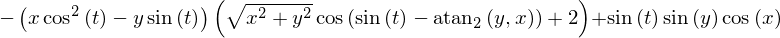

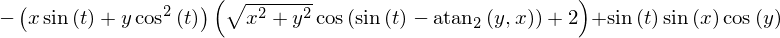

In [3]:
#use numpy for evaluations
import numpy as np
from IPython.display import  display
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# Create the manufactured solution and run through sympy 
# to create the forcing function and solutions etc
#
# Import specific sympy functions to avoid overloading 
# numpy etc functions
from sympy.utilities.lambdify import lambdify
from sympy import (symbols, 
                   simplify,
                   diff)
from sympy.functions import (sin as sy_sin,
                             cos as sy_cos,
                             atan2 as sy_atan2,
                             sqrt as sy_sqrt)
from sympy import pi as sy_pi

# use xs and ts to represent symbolic x and t
xs,ys,ts = symbols('x y t')

# viscosity coefficient
mu = 1.0

# Given solution: (Modify here and if needed add more sympy.functions above with 
#                  notation sy_* to distinguish as symbolic functions)
rs = sy_sqrt(xs*xs + ys*ys)
thetas = sy_atan2(ys,xs)
rhos = 2 + rs*sy_cos(thetas-sy_sin(ts))
# rhos = 2 + rs*sy_cos(thetas-sy_sin(ts))
ps = sy_sin(xs)*sy_sin(ys)*sy_sin(ts)
us = -ys*sy_cos(ts)
vs = xs*sy_cos(ts)

# manufacture the source terms:

f1s = simplify((rhos*(diff(us,ts) + us*diff(us,xs) + vs*diff(us,ys)) + diff(ps,xs) - diff(mu*us,xs,xs) - diff(mu*us,ys,ys)))
f2s = simplify((rhos*(diff(vs,ts) + us*diff(vs,xs) + vs*diff(vs,ys)) + diff(ps,ys) - diff(mu*vs,xs,xs) - diff(mu*vs,ys,ys)))

display(f1s)
display(f2s)
# print "f1(x,y,t) = ", f1s
# print "f2(x,y,t) = ", f2s

# use lambdify to convert from sympy to python expressions
pl = lambdify((xs, ys, ts), ps, "numpy")
ul = lambdify((xs, ys, ts), us, "numpy")
vl = lambdify((xs, ys, ts), vs, "numpy")
rhol = lambdify((xs, ys, ts), rhos, "numpy")
f1l = lambdify((xs, ys, ts), f1s, "numpy")
f2l = lambdify((xs, ys, ts), f2s, "numpy")

# convert python expressions to the format we need for multidimensional x values
def ptrue(x,t): 
    return pl(x[...,0],x[...,1],t)

def utrue(x,t):
    return ul(x[...,0],x[...,1],t)

def vtrue(x,t):
    return vl(x[...,0],x[...,1],t)

def rhotrue(x,t):
    return rhol(x[...,0],x[...,1],t)

def f1true(x,t):
    return f1l(x[...,0],x[...,1],t)

def f2true(x,t):
    return f2l(x[...,0],x[...,1],t)


###Physical Model

Create a circular domain $\Omega = \{ (x,y) \:|\: x^2+y^2<1 \}$

We have two flags on the boundary which for now are both Dirichlet boundary conditions but we leave room for testing other types of boundary conditions later.

In [4]:
unitCircle = True
if unitCircle:
    from math import pi, ceil, cos, sin
    
    # modify these for changing circular domain location and size
    radius = 1.0
    center_x = 0.0
    center_y = 0.0
    he = 2.0*pi/50.0  # h size for edges of circle

    # no need to modify past here
    nvertices = nsegments = int(ceil(2.0*pi/he))
    dtheta = 2.0*pi/float(nsegments)
    vertices= []
    vertexFlags = []
    segments = []
    segmentFlags = []

    # boundary tags and dictionary
    boundaries=['left','right','bottom','top','front','back']
    boundaryTags=dict([(key,i+1) for (i,key) in enumerate(boundaries)])

    # set domain with top and bottom
    for i in range(nsegments):
        theta = pi/2.0 - i*dtheta
        vertices.append([center_x+radius*cos(theta),center_y+radius*sin(theta)])
        if i in [nvertices-1,0,1]:
            vertexFlags.append(boundaryTags['top'])
        else:
            vertexFlags.append(boundaryTags['bottom'])
        segments.append([i,(i+1)%nvertices])
        if i in [nsegments-1,0]:
            segmentFlags.append(boundaryTags['top'])
        else:
            segmentFlags.append(boundaryTags['bottom'])
    domain = Domain.PlanarStraightLineGraphDomain(vertices=vertices,
                                                  vertexFlags=vertexFlags,
                                                  segments=segments,
                                                  segmentFlags=segmentFlags)
    #go ahead and add a boundary tags member 
    domain.boundaryTags = boundaryTags
    domain.writePoly("mesh")
    
    #
    #finished setting up circular domain
    #
    triangleOptions="VApq30Dena%8.8f" % ((he**2)/2.0,)

    #logEvent("""Mesh generated using: triangle -%s %s"""  % (triangleOptions,domain.polyfile+".poly"))
    


Define the physical inputs to the model

In [5]:
physics = default_p
physics.name = "navier_stokes_2d"
physics.nd = 2; #Two dimension

physics.domain = domain
physics.T = 10.0

#the object for evaluating the coefficients   
physics.coefficients=NavierStokes.NavierStokes2D(f1ofx=f1true,
                                                 f2ofx=f2true,
                                                 mu=mu,
                                                 densityFunction=rhotrue)   

Define boundary conditions and initial conditions of system

In [6]:
#this function's job is to return another function holding the Dirichlet boundary conditions 
# wherever they are set

def getDBC_p(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: ptrue(x,t)
    elif flag == boundaryTags['bottom']:
        return lambda x,t: ptrue(x,t)
    else:
        return None
    
def getDBC_u(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: utrue(x,t)
    elif flag == boundaryTags['bottom']:
        return lambda x,t: utrue(x,t)
    else:
        return None
    
def getDBC_v(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: vtrue(x,t)
    elif flag == boundaryTags['bottom']:
        return lambda x,t: vtrue(x,t)
    else:
        return None
    
def getNone(x,flag):
    return None

def getZeroFlux(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: 0.0
    elif flag == boundaryTags['bottom']:
        return lambda x,t: 0.0
    else:
        return None
    
class getIBC_p:
    def __init__(self):
        self.ptrue=ptrue
        pass
    def uOfXT(self,x,t):
        return self.ptrue(x,t)

class getIBC_u:
    def __init__(self):
        self.utrue=utrue
        pass
    def uOfXT(self,x,t):
        return self.utrue(x,t)

class getIBC_v:
    def __init__(self):
        self.vtrue=vtrue
        pass
    def uOfXT(self,x,t):
        return self.vtrue(x,t)
    
physics.initialConditions = {0:getIBC_u(),
                             1:getIBC_v(),
                             2:getIBC_p()}

physics.dirichletConditions = {0:getDBC_u,
                               1:getDBC_v,
                               2:getDBC_p }

physics.advectiveFluxBoundaryConditions = {2:getNone}#dummy condition for non-existent  advective flux
#physics.advectiveFluxBoundaryConditions = {1:getZeroFlux}#dummy condition for non-existent  advective flux

physics.diffusiveFluxBoundaryConditions = {0:{0:getZeroFlux},
                                           1:{1:getZeroFlux}}#viscous flux
physics.fluxBoundaryConditions = {0:'outFlow',1:'outFlow',2:'mixedFlow'}
#physics.fluxBoundaryConditions = {0:'setFlow',1:'setFlow',2:'setFlow'}

Define the numerics input for the problem

In [7]:
numerics=default_n

numerics.femSpaces = {0:FemTools.C0_AffineQuadraticOnSimplexWithNodalBasis, # u velocity space
                      1:FemTools.C0_AffineQuadraticOnSimplexWithNodalBasis, # v velocity space
                      2:FemTools.C0_AffineLinearOnSimplexWithNodalBasis} #p pressure space

from TimeIntegrationPS import NonConservativeBackwardEuler
# numerics.timeIntegration = TimeIntegration.BackwardEuler
numerics.timeIntegration = NonConservativeBackwardEuler

nFrames = 41
dt = physics.T/(nFrames-1)
numerics.tnList = [i*dt for i in range(nFrames)]


#Quadrature rules for elements and element  boundaries
quad_degree = 5  # exact for polynomials of this degree
numerics.elementQuadrature = Quadrature.SimplexGaussQuadrature(physics.nd,quad_degree)
numerics.elementBoundaryQuadrature = Quadrature.SimplexGaussQuadrature(physics.nd-1,quad_degree)


#Matrix type
numerics.numericalFluxType = NumericalFlux.StrongDirichletFactory(physics.fluxBoundaryConditions)
#numerics.numericalFluxType = MixedDarcy_exterior
#numerics.numericalFluxType = NumericalFlux.Advection_DiagonalUpwind_Diffusion_IIPG_exterior
#numerics.numericalFluxType = NumericalFlux.Advection_Diagonal_average
numerics.matrix = LinearAlgebraTools.SparseMatrix
#use petsc solvers wrapped by petsc4py
#numerics.multilevelLinearSolver = LinearSolvers.KSP_petsc4py
#numerics.levelLinearSolver = LinearSolvers.KSP_petsc4py
#using petsc4py requires weak boundary condition enforcement
#can also use our internal wrapper for SuperLU
numerics.multilevelLinearSolver = LinearSolvers.LU
numerics.levelLinearSolver = LinearSolvers.LU

numerics.multilevelNonlinearSolver = NonlinearSolvers.Newton
numerics.levelNonlinearSolver = NonlinearSolvers.Newton

#linear solve rtolerance

numerics.linTolFac = 0.001  # relatice tolerance for linear solver
numerics.tolFac = 0.0 # absolute tolerance

numerics.l_atol_res = 1.0e-5
numerics.nl_atol_res = 1.0e-5
numerics.periodicDirichletConditions=None
#
# split operator options (trivial since we're not splitting)
#
so = default_so
so.name = physics.name
so.sList=[default_s]
so.tnList = numerics.tnList

Construct a NumericalSolution object and solve the problem

In [8]:
ns = NumericalSolution.NS_base(so,[physics],[numerics],so.sList,opts)
ns.calculateSolution('run1')

[      11] Initializing NumericalSolution for navier_stokes_2d
 System includes: 
navier_stokes_2d

[      11] Setting Archiver(s)
[      11] Setting up MultilevelMesh
[      11] Building one multilevel mesh for all models
[      11] Generating mesh for navier_stokes_2d
[      11] Calling Triangle to generate 2D mesh fornavier_stokes_2d
TriangleBaseMesh nbase=1 baseFlags= q30DenA 
flags =  q30DenA  must have p, appending
[      11] Converting to Proteus Mesh
[      11] Generating 1-level mesh from coarse Triangle mesh
[      11] Partitioning mesh among 1 processors using partitioningType = 0
[      11] Number of Subdomain Elements Owned= 164
[      11] Number of Subdomain Elements = 164
[      11] Number of Subdomain Nodes Owned= 108
[      11] Number of Subdomain Nodes = 108
[      11] Number of Subdomain elementBoundaries Owned= 271
[      11] Number of Subdomain elementBoundaries = 271
[      11] Number of Subdomain Edges Owned= 271
[      11] Number of Subdomain Edges = 271
[      

False

Create various functions to extract solutions at a specific time step

In [9]:
%matplotlib inline

from IPython.core.display import clear_output
from matplotlib import colors

def plot_current_results(in_place=True):
    from matplotlib import  pyplot as plt
    """Makes a blocking call to retrieve remote data and displays the solution mesh
    as a contour plot.
    
    Parameters
    ----------
    in_place : bool
        By default it calls clear_output so that new plots replace old ones.  Set
        to False to allow keeping of all previous outputs.
    """
    model = ns.modelList[1].levelModelList[-1]
    nodes = model.mesh.nodeArray
    triangles = model.mesh.elementNodesArray
    x = nodes[:,0]
    y = nodes[:,1]
    u = model.u[0].dof_last
    fig, ax = plt.subplots()
    ax.tricontourf(x, y, triangles, u)
    if in_place:
        clear_output()
    plt.axis('equal')
    display(fig)
    return fig


def plot_results_step_i(step_i=0,in_place=True):
    from matplotlib import  pyplot as plt
    from tables import openFile
    """Makes a blocking call to retrieve remote data and displays the solution mesh
    as a contour plot.
    
    Parameters
    ----------
    in_place : bool
        By default it calls clear_output so that new plots replace old ones.  Set
        to False to allow keeping of all previous outputs.
    """
    h5=openFile("navier_stokes_2d0.h5","r")
    triangles = h5.getNode("/elementsSpatial_Domain%i" %step_i)
    xp = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:,0]
    yp = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:,1]
    p = h5.getNode("/p%i" %step_i)[:]
    nn = len(p)
    xvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,0]
    yvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,1]
    u = h5.getNode("/u%i" %step_i)[:nn]
    v = h5.getNode("/v%i" %step_i)[:nn]
    fig = plt.figure(figsize=(10,4)) # w, h in inches
    axp = fig.add_subplot(131)
    axu = fig.add_subplot(132)
    axv = fig.add_subplot(133)
    fig.tight_layout() # spread out the plots so that they don't overlap

    title = fig.suptitle("t=%0.2f"%numerics.tnList[step_i],x=0.5, y=1.00,
             horizontalalignment='center',
             fontsize=12,)
    
    ap = axp.tricontourf(xp, yp, triangles, p, norm=plt.Normalize(vmax=abs(p).max(), vmin=-abs(p).max()))
    au = axu.tricontourf(xvel, yvel, triangles, u, norm=plt.Normalize(vmax=abs(u).max(), vmin=-abs(u).max()))
    av = axv.tricontourf(xvel, yvel, triangles, v, norm=plt.Normalize(vmax=abs(v).max(), vmin=-abs(v).max()))
    if in_place:
        clear_output()
    axp.set_aspect('equal')
    axu.set_aspect('equal')
    axv.set_aspect('equal')
#     display(fig)
    h5.close()
    return fig

# from tables import openFile
# h5=openFile("navier_stokes_2d0.h5","r")
# print h5
# fig = plot_results_step_i(10)

Plot animation of pressure, and velocity components

In [ ]:
from matplotlib import  pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from tables import openFile

# setup initial figure spacing and create frames for input
fig = plt.figure(figsize=(10,7)) # w, h in inches
axp = fig.add_subplot(231)
axu = fig.add_subplot(232)
axv = fig.add_subplot(233)
axep = fig.add_subplot(234)
axeu = fig.add_subplot(235)
axev = fig.add_subplot(236)
axp.set_aspect('equal')
axu.set_aspect('equal')
axv.set_aspect('equal')
axep.set_aspect('equal')
axeu.set_aspect('equal')
axev.set_aspect('equal')
axp.set_title('computed p')
axu.set_title('computed u')
axv.set_title('computed v')
axep.set_title('exact p')
axeu.set_title('exact u')
axev.set_title('exact v')
fig.tight_layout() # spread out the plots so that they don't overlap

title = fig.suptitle("",x=0.5, y=1.00,
         horizontalalignment='center',
         fontsize=12,)

def init():
    ap = axp.plot([],[])
    au = axu.plot([],[])
    av = axv.plot([],[])
    aep = axp.plot([],[])
    aeu = axu.plot([],[])
    aev = axv.plot([],[])
    return (ap,au,av,aep,aeu,aev)


def animate(step_i):
    # time
    t = numerics.tnList[step_i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("navier_stokes_2d0.h5","r")        
    triangles = h5.getNode("/elementsSpatial_Domain%i" %step_i)
    xpvec = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:]
    xp = xpvec[:,0]
    yp = xpvec[:,1]
    p = h5.getNode("/p%i" %step_i)[:]
    p_true = ptrue(xpvec,t)
    
    nn = len(p)
    xvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,0]
    yvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,1]
    u = h5.getNode("/u%i" %step_i)[:nn]
    v = h5.getNode("/v%i" %step_i)[:nn]
    u_true = utrue(xpvec,t)
    v_true = vtrue(xpvec,t)
    
    ap = axp.tricontourf(xp, yp, triangles, p, norm=plt.Normalize(vmax=1.0, vmin=-1))
    aep = axep.tricontourf(xp, yp, triangles, p_true, norm=plt.Normalize(vmax=1.0, vmin=-1))
    au = axu.tricontourf(xvel, yvel, triangles, u, norm=plt.Normalize(vmax=1., vmin=-1.))
    aeu = axeu.tricontourf(xvel, yvel, triangles, u_true, norm=plt.Normalize(vmax=1., vmin=-1.))    
    av = axv.tricontourf(xvel, yvel, triangles, v, norm=plt.Normalize(vmax=1., vmin=-1.))
    aev = axev.tricontourf(xvel, yvel, triangles, v_true, norm=plt.Normalize(vmax=1., vmin=-1.))
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (ap,au,av,aep,aeu,aev)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=np.size(numerics.tnList), interval=30, blit=True) # 30 milliseconds between frames  